In [2]:
##Author: panthadeep_b; Time: 22.25 IST - 14Feb'25
##WAP to implement logistic regression

import sys
import pandas as pd
import numpy as np
from array import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics
from sklearn import datasets
import seaborn as sns

##Load the dataset
data_set = pd.read_csv("housing.csv");
#print("The loaded data set is:\n", data_set);

#Extracting Independent and dependent Variable
x = data_set.iloc[:, [4,5]];  
y = data_set.iloc[:, 13];

# Convert the target variable to binary
y = (y > np.median(y)).astype(int)

##***Convert data to suit the scikit-learn***
#x = x.to_numpy().reshape(len(x),2);
#y = y.to_numpy().reshape(len(y),1);

print("X:\n",x);
print("Y:\n",y);

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#feature Scaling  
scaler = StandardScaler()    
x_train = scaler.fit_transform(x_train)    
x_test = scaler.transform(x_test)  

#print("X_train:",x_train);
#print("X_test:",x_test);

#Train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)



X:
      0.538  6.575
0    0.469  6.421
1    0.469  7.185
2    0.458  6.998
3    0.458  7.147
4    0.458  6.430
..     ...    ...
500  0.573  6.593
501  0.573  6.120
502  0.573  6.976
503  0.573  6.794
504  0.573  6.030

[505 rows x 2 columns]
Y:
 0      1
1      1
2      1
3      1
4      1
      ..
500    1
501    0
502    1
503    1
504    0
Name: 24, Length: 505, dtype: int64


LogisticRegression()

Accuracy: 76.24%
Confusion Matrix:
 [[42 13]
 [11 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78        55
           1       0.73      0.76      0.74        46

    accuracy                           0.76       101
   macro avg       0.76      0.76      0.76       101
weighted avg       0.76      0.76      0.76       101



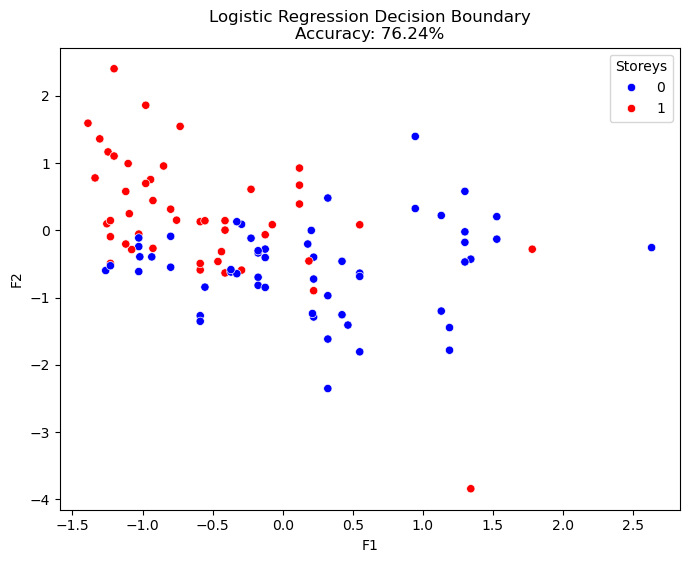

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Evaluate the model
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_test, palette={
				0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Storeys", loc="upper right")
plt.show()


